In [3]:
import pandas as pd

cnPapers = pd.read_excel("Central_Data.xlsx",names=["report","Time"])
cnPapers.head()

,report,Time
0,《关于扩大当前农业农村基础设施建设投资的工作方案》印发\n发布人：裴文超来源：农业农村部官网...,5
1,标 题： 中国人民银行 国家金融监督管理总局 证监会 财政部 农业农村部关于金融支持全面推...,5
2,07B250303202300241\n信息所属单位\n农村社会事业促进司\n信息名称\n中...,5
3,题： 体育总局 中央文明办 发展改革委 教育部 国家民委 财政部 住房城乡建设部 农业农...,5
4,题： 人力资源社会保障部 国家发展改革委 财政部 农业农村部 国家乡村振兴局关于进一步支...,5


In [4]:
## 打印信息
cnPapers.info()
## 检查是否有空值
cnPapers.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   report  96 non-null     object
 1   Time    96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


report    0
Time      0
dtype: int64

In [5]:
## 删除空值
cnPapers.dropna(inplace = True)
## 检查是否有空值
cnPapers.isnull().sum()
## 打印信息
cnPapers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   report  96 non-null     object
 1   Time    96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [6]:
# 时间字段的类型转换，从float转化为int
cnPapers[["Time"]] = cnPapers[["Time"]].astype(int)

In [7]:
## 按时间排序
cnPapers.sort_values("Time",inplace=True)
cnPapers.head()

,report,Time
25,各省、自治区、直辖市及计划单列市农机（农业、农牧）局（厅、委、办），新疆生产建设兵团农业局，...,1
28,农业农村部等15部门关于促进农产品精深加工高质量发展若干政策措施的通知农产发〔2018〕3号...,1
27,各省、自治区、直辖市农垦管理部门，新疆生产建设兵团农业局：为贯彻落实2018年中央一号文件精...,1
26,各省、自治区、直辖市及计划单列市农业（农牧、农村经济）、农机、畜牧、兽医、农垦、农产品加工、...,1
31,各省、自治区、直辖市及计划单列市农业（农牧、农村经济）、农机、畜牧、兽医、渔业（水利）厅（局...,1


In [8]:
cnPapers.tail()

,report,Time
12,题： 农业农村部等八部门关于加快推进深远海养殖发展的意见 发文机关： 农业农村部 工业和...,5
13,标 题： 国家林业和草原局 农业农村部 自然资源部 国家乡村振兴局关于印发《“十四五”乡村...,5
14,标 题： 工业和信息化部等十一部门关于培育传统优势食品产区和地方特色食品产业的指导意见 发...,5
7,标 题： 农业农村部关于推进稻渔综合种养产业高质量发展的指导意见 发文机关： 农业农村部\...,5
0,《关于扩大当前农业农村基础设施建设投资的工作方案》印发\n发布人：裴文超来源：农业农村部官网...,5


In [9]:
## 统计不同年份文献数量
cnPapers["Time"].value_counts() 

Time
4    26
3    23
1    21
5    15
2    11
Name: count, dtype: int64

In [11]:
import jieba

## 加载自定义词典

jieba.load_userdict("cendict.txt")
stopLists = list(pd.read_csv("censtop.txt",names=["w"], encoding="utf-8",delimiter='\t').w)

def paperCut(text):
    return [w for w in jieba.cut(text) if w not in stopLists and len(w)>1]
wordLists = [paperCut(paper) for paper in cnPapers.report]
#wordLists[0]

In [12]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel

## 构建词篇矩阵
cnDict = Dictionary(wordLists)
cnCorpus = [cnDict.doc2bow(text) for text in wordLists]

## 进行TF-IDF计算
cn_tfidf_model = TfidfModel(cnCorpus)
cn_corpus_tfidf = cn_tfidf_model[cnCorpus]
cn_corpus_tfidf[0]

[(0, 0.012939726086610759),
 (1, 0.01331687132770609),
 (2, 0.026333585397347002),
 (3, 0.014531682782047849),
 (4, 0.12700649009394732),
 (5, 0.011547321273485353),
 (6, 0.06185980392452457),
 (7, 0.13149018785481437),
 (8, 0.043066024014312754),
 (9, 0.042836640235136995),
 (10, 0.05077709172671938),
 (11, 0.00336909101216852),
 (12, 0.08613204802862551),
 (13, 0.004380472652079599),
 (14, 0.002895576367323256),
 (15, 0.016390112556560046),
 (16, 0.022445051799692674),
 (17, 0.05077709172671938),
 (18, 0.05077709172671938),
 (19, 0.004061532668628577),
 (20, 0.002746249036001598),
 (21, 0.023133203137219917),
 (22, 0.027643888589499472),
 (23, 0.05455724986266862),
 (24, 0.09777402531748954),
 (25, 0.03287254696370359),
 (26, 0.05077709172671938),
 (27, 0.05077709172671938),
 (28, 0.07449007073976145),
 (29, 0.0017535777339627774),
 (30, 0.05077709172671938),
 (31, 0.05077709172671938),
 (32, 0.01331687132770609),
 (33, 0.05219353681627089),
 (35, 0.00522865837420412),
 (36, 0.025161

In [13]:
from gensim.models import ldaseqmodel
## 定义时间切片2021 
time_slice = [21,11,23,25,16]



In [35]:
## 忽略警告提醒
import warnings
warnings.filterwarnings("ignore")
import numpy as np

## 主题一致性是评测主题实验效果优劣的指标,利用主题一致性判断最优主题数目
from gensim.models.coherencemodel import CoherenceModel

def cal_coherence(minTopicNums,MaxTopicNum,timeSpans):
    
    period_coherence = []
    
    for t_num in range(minTopicNums,MaxTopicNum):
        
        # corpus=None, time_slice=None, id2word=None, alphas=0.01, num_topics=10, 
        # passes=10, random_state=None, em_min_iter=6, em_max_iter=20, chunksize=100
        
        ldaseq = ldaseqmodel.LdaSeqModel(corpus = cn_corpus_tfidf, 
                                     alphas=50/t_num,
                                     id2word = cnDict, 
                                     time_slice = time_slice, 
                                     num_topics = t_num,
                                     passes=1,
                                     em_min_iter=3, 
                                     em_max_iter=6)
        one_period = []
        for span in range(timeSpans):
            topics_dtm = ldaseq.dtm_coherence(time = span)
            cm_DTM = CoherenceModel(topics = topics_dtm, 
                                    texts = wordLists, 
                                    dictionary = cnDict, 
                                    coherence = 'c_v')
            one_period.append(cm_DTM.get_coherence())
        
        period_coherence.append(np.mean(one_period, axis=0))
        
    return period_coherence

In [ ]:
## 忽略警告提醒
import warnings
warnings.filterwarnings("ignore")

period_coherences = cal_coherence(6,20,5)
period_coherences

In [14]:
goodLdaseq = ldaseqmodel.LdaSeqModel(corpus = cn_corpus_tfidf, 
                                     id2word = cnDict, 
                                     time_slice = time_slice, 
                                     num_topics = 7,
                                     random_state=100)

D:\Users\Lenovo\anaconda3\lib\site-packages\gensim\models\ldaseqmodel.py:297: RuntimeWarning: divide by zero encountered in scalar divide
  convergence = np.fabs((bound - old_bound) / old_bound)


In [15]:
goodLdaseq.print_topics(time = 1,top_terms=15)##第一个时间段的8个主题情况

[[('100', 0.05567735824642088),
  ('秋冬种', 0.035195853217784026),
  ('充足', 0.016032948466206936),
  ('反复强调', 0.011560282582213055),
  ('脱销', 0.011560282582213045),
  ('囤粮', 0.011560282582213045),
  ('肥用', 0.011560282582213003),
  ('抢粮', 0.011560282582212984),
  ('倾向', 0.011560282582212963),
  ('恐慌', 0.011560282582212963),
  ('土壤肥力', 0.011560282582212963),
  ('相比之下', 0.011560282582212922),
  ('情绪', 0.011560282582212882),
  ('冬种', 0.011560282582212882),
  ('今年以来', 0.01156028258221286)],
 [('机械化', 0.0017403557749316816),
  ('100', 0.0015441688573070746),
  ('农技', 0.001495201836436368),
  ('农机', 0.0013423095809863594),
  ('补贴', 0.0013257848141421972),
  ('农场', 0.0013121328143859453),
  ('创业', 0.0012700006980073922),
  ('品牌', 0.0012671153622923876),
  ('养殖', 0.0011691012235782742),
  ('数字', 0.0011473437051445553),
  ('农产品', 0.0011334852153698787),
  ('投资', 0.001126124990716691),
  ('农业科技', 0.0011096436671498057),
  ('耕地', 0.0010858392201117486),
  ('种业', 0.0010798256506955727)],
 [('100', 0.

In [16]:


goodLdaseq.print_topics(time = 2,top_terms=20)
## 识别主题1在三个阶段的主题内容
'''
goodLdaseq.print_topic_times(topic=0, top_terms=10)
'''

'\ngoodLdaseq.print_topic_times(topic=0, top_terms=10)\n'

In [17]:
## 打印文档主题偏好
doc = goodLdaseq.doc_topics(0) 
print (doc)

[0.00117866 0.00117866 0.00117866 0.00117866 0.00117866 0.99292803
 0.00117866]


In [18]:
## 文档主题概率识别
sim = []
for i in range(cnPapers.report.size):
    sim.append(goodLdaseq.doc_topics(i))
tv = pd.DataFrame(sim)
sim[:9]

[array([0.00117866, 0.00117866, 0.00117866, 0.00117866, 0.00117866,
        0.99292803, 0.00117866]),
 array([8.63513725e-04, 9.94818918e-01, 8.63513725e-04, 8.63513725e-04,
        8.63513725e-04, 8.63513725e-04, 8.63513725e-04]),
 array([8.41240786e-04, 9.94952555e-01, 8.41240786e-04, 8.41240786e-04,
        8.41240786e-04, 8.41240786e-04, 8.41240786e-04]),
 array([5.63310263e-04, 9.96620138e-01, 5.63310263e-04, 5.63310263e-04,
        5.63310263e-04, 5.63310263e-04, 5.63310263e-04]),
 array([6.55366878e-04, 9.96067799e-01, 6.55366878e-04, 6.55366878e-04,
        6.55366878e-04, 6.55366878e-04, 6.55366878e-04]),
 array([0.00080541, 0.57046721, 0.00080541, 0.00080541, 0.00080541,
        0.00080541, 0.42550574]),
 array([0.00101984, 0.3641753 , 0.00101984, 0.63072552, 0.00101984,
        0.00101984, 0.00101984]),
 array([0.00139367, 0.991638  , 0.00139367, 0.00139367, 0.00139367,
        0.00139367, 0.00139367]),
 array([0.00098632, 0.3626241 , 0.63244429, 0.00098632, 0.00098632,
    

In [19]:
## 转换成dataFrame
tv = pd.DataFrame(sim)
## 设置阈值
tv[tv<0.0001] = 0
tv.head()

## 阶段划分
period1 = tv.iloc[:time_slice[0]]
period2 = tv.iloc[time_slice[0]:time_slice[1]+time_slice[0]]
period3 = tv.iloc[time_slice[1]+time_slice[0]:time_slice[2]+time_slice[1]+time_slice[0]]
period4 = tv.iloc[time_slice[2]+time_slice[1]+time_slice[0]:time_slice[3]+time_slice[2]+time_slice[1]+time_slice[0]]
period5 = tv.iloc[time_slice[3]+time_slice[2]+time_slice[1]+time_slice[0]:time_slice[4]+time_slice[3]+time_slice[2]+time_slice[1]+time_slice[0]]
print("第一阶段政策数量：",len(period1))
print("第二阶段政策数量：",len(period2))
print("第三阶段政策数量：",len(period3))
print("第四阶段政策数量：",len(period4))
print("第五阶段政策数量：",len(period5))

##每个阶段平均主题支持度 
a=period1.agg("mean")
b=period2.agg("mean")
c=period3.agg("mean")
d=period4.agg("mean")
e=period5.agg("mean")
output=[a,b,c,d,e]
##type(output)


from pandas.core.frame import DataFrame
shu=DataFrame(output)
#=["topic1","topic2","topic3","topic4","topic5"]

#type(shu)
shu=shu.transpose()
shu.columns=["第一阶段","第二阶段","第三阶段","第四阶段","第五阶段"]
shu.index=["topic1","topic2","topic3","topic4","topic5","topic6","topic7"]
shu

第一阶段政策数量： 21
第二阶段政策数量： 11
第三阶段政策数量： 23
第四阶段政策数量： 25
第五阶段政策数量： 16


,第一阶段,第二阶段,第三阶段,第四阶段,第五阶段
topic1,0.001011,0.000820,0.044163,0.000829,0.001055
topic2,0.649196,0.708565,0.604861,0.648912,0.389833
topic3,0.031081,0.000820,0.001003,0.059701,0.063266
topic4,0.059711,0.086950,0.130425,0.030694,0.108849
topic5,0.001011,0.000820,0.086940,0.080001,0.124997
topic6,0.236755,0.201203,0.116385,0.179035,0.187160
topic7,0.021235,0.000820,0.016224,0.000829,0.124840


D:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38454 (\N{CJK UNIFIED IDEOGRAPH-9636}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27573 (\N{CJK UNIFIED IDEOGRAPH-6BB5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  fig.canvas.print_figure(b

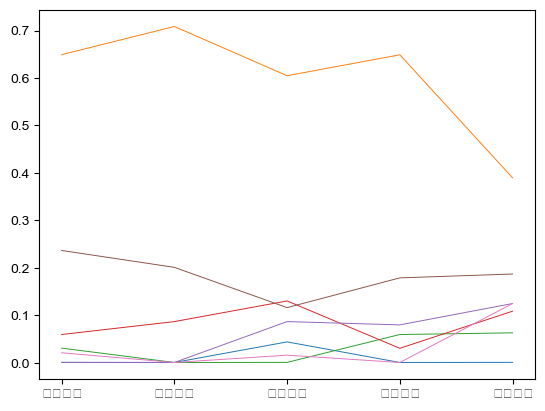

In [20]:
from matplotlib import pyplot as plt
shu1=shu.transpose()
plt.plot(shu1,lw=0.7)
plt.rcParams['font.sans-serif']=['Arial']
#plt.legend()

## 输出关键词

In [257]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import itertools
#type(word_freq) 
ff=DataFrame(wordLists)
array=np.array(ff) 
aa=array.tolist()
aa=list(itertools.chain.from_iterable(array))##多维转换为一维数据



In [258]:
A=DataFrame(aa)